In [1]:
import numpy as np
import pandas as pd
import csv

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection  import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv("gbm-data.csv").values

In [3]:
data

array([[1.        , 0.        , 0.49700901, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.36666667, 0.60629148, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.0333    , 0.48012427, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.2       , 0.52056377, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.1       , 0.7656462 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.13333333, 0.53395198, ..., 0.        , 0.        ,
        0.        ]])

In [7]:
y = data[:,0]
X = data[:,1:]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

      Iter       Train Loss   Remaining Time 
         1           1.0190           18.43s
         2           0.9192           16.23s
         3           0.8272           14.28s
         4           0.7834           13.94s
         5           0.7109           13.58s
         6           0.6368           13.63s
         7           0.5797           13.25s
         8           0.5610           12.74s
         9           0.5185           12.87s
        10           0.4984           12.55s
        20           0.1999           11.56s
        30           0.1313           10.93s
        40           0.0790           10.24s
        50           0.0511            9.68s
        60           0.0352            9.13s
        70           0.0245            8.57s
        80           0.0162            8.04s
        90           0.0114            7.53s
       100           0.0077            7.03s
       200           0.0004            2.05s


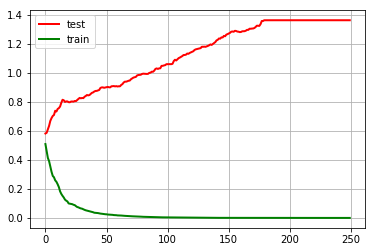

      Iter       Train Loss   Remaining Time 
         1           1.1255           14.38s
         2           1.0035           14.22s
         3           0.9386           14.08s
         4           0.8844           13.52s
         5           0.8381           13.14s
         6           0.7995           12.60s
         7           0.7559           12.25s
         8           0.7205           12.00s
         9           0.6958           11.93s
        10           0.6725           11.83s
        20           0.4672           10.89s
        30           0.3179           10.35s
        40           0.2274            9.91s
        50           0.1774            9.35s
        60           0.1394            8.89s
        70           0.1050            8.42s
        80           0.0805            7.92s
        90           0.0650            7.41s
       100           0.0511            6.96s
       200           0.0058            2.37s


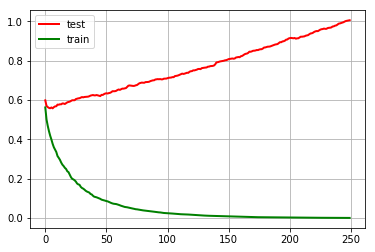

      Iter       Train Loss   Remaining Time 
         1           1.2095           17.16s
         2           1.1006           15.64s
         3           1.0240           15.06s
         4           0.9729           15.03s
         5           0.9387           13.99s
         6           0.8948           13.98s
         7           0.8621           13.47s
         8           0.8360           12.99s
         9           0.8171           12.83s
        10           0.7883           12.63s
        20           0.6164           11.33s
        30           0.4933           10.58s
        40           0.4248            9.81s
        50           0.3345            9.42s
        60           0.2760            8.86s
        70           0.2263            8.42s
        80           0.1971            7.87s
        90           0.1693            7.40s
       100           0.1388            6.97s
       200           0.0294            2.29s


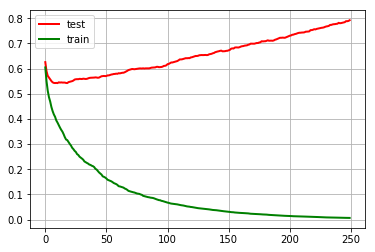

      Iter       Train Loss   Remaining Time 
         1           1.2613           14.42s
         2           1.1715           14.29s
         3           1.1009           14.17s
         4           1.0529           14.63s
         5           1.0130           14.57s
         6           0.9740           14.39s
         7           0.9475           13.67s
         8           0.9197           13.83s
         9           0.8979           13.41s
        10           0.8730           13.67s
        20           0.7207           11.61s
        30           0.6055           10.72s
        40           0.5244           10.07s
        50           0.4501            9.44s
        60           0.3908            8.91s
        70           0.3372            8.41s
        80           0.3009            7.95s
        90           0.2603            7.48s
       100           0.2327            6.98s
       200           0.0835            2.29s


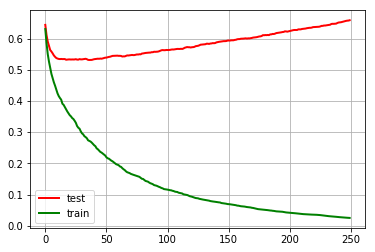

      Iter       Train Loss   Remaining Time 
         1           1.3199           14.52s
         2           1.2645           15.96s
         3           1.2170           15.32s
         4           1.1775           15.25s
         5           1.1404           14.98s
         6           1.1106           14.77s
         7           1.0844           14.75s
         8           1.0617           14.70s
         9           1.0411           14.56s
        10           1.0223           14.43s
        20           0.8864           12.96s
        30           0.7844           11.68s
        40           0.7176           10.66s
        50           0.6590            9.93s
        60           0.6120            9.27s
        70           0.5599            8.72s
        80           0.5242            8.14s
        90           0.4829            7.63s
       100           0.4473            7.11s
       200           0.2379            2.29s


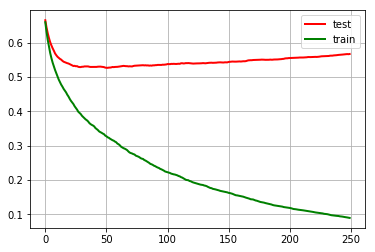

In [9]:
minimum = []
plt
for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:
    classifier = GradientBoostingClassifier(learning_rate = learning_rate, n_estimators=250, verbose=True, random_state=241)
    classifier.fit(X_train, y_train)
    
    train_loss = [0 for i in range(250)]
    test_loss = [0 for i in range(250)]
    
    for i, y_pred in enumerate(classifier.staged_decision_function(X_train)):
        y_pred = 1.0 / (1.0 +np.exp(-y_pred))
        train_loss[i] = log_loss(y_train, y_pred)
    
    for i, y_pred in enumerate(classifier.staged_decision_function(X_test)):
        y_pred = [1 / (1 + math.exp(-k)) for k in y_pred]
        test_loss[i] = log_loss(y_test, y_pred)
        
    
    minum = min(test_loss)
    index = test_loss.index(minum)
    
    minimum.append([learning_rate, minum, index])
    plt.grid()
    plt.plot(test_loss, 'r', linewidth = 2)
    plt.plot(train_loss, 'g', linewidth = 2)
    plt.legend(['test','train'])
    plt.show()


In [10]:
print(minimum)

[[1, 0.5822942594278476, 0], [0.5, 0.5582025523164261, 6], [0.3, 0.5423141110024554, 10], [0.2, 0.5314507963190638, 36], [0.1, 0.5269201872275844, 51]]


In [113]:
open('answer2.txt', 'tw', encoding='utf-8').write(str(round(minimum[3][1],2))+' '+str(minimum[3][2]))

7

In [114]:
vopen('answer1.txt', 'tw', encoding='utf-8').write('overfitting')

11

In [11]:
forest = GradientBoostingClassifier(n_estimators = 36, random_state=241)

In [12]:
forest.fit(X_train, y_train)
proba = forest.predict_proba(X_test)
test_loss = log_loss(y_test, y_pred)
print(test_loss)

0.5672749940622688


In [135]:
open('answer3.txt', 'tw', encoding='utf-8').write(str(round(test_loss,2)))

4

In [200]:
minim = 1000
index = -1
for i in range(11,50):
    forest1 = RandomForestClassifier(n_estimators = i, random_state=241)
    forest1.fit(X_train, y_train)
    proba = forest1.predict_proba(X_test)
    test_loss = log_loss(y_test, y_pred)
    print(test_loss)
    if (test_loss < minim):
        minim = test_loss
        index = i

1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495
1.3632148575543495


In [152]:
minim

0.5672749940622688

In [153]:
index

11

In [195]:
len(c)

750

In [186]:
len(X_test)

3001

In [201]:
type(min)

numpy.float64